In [1]:
!pip install pandas

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB 1.9 MB/s eta 0:00:06
    --------------------------------------- 0.2/11.1 MB 1.8 MB/s eta 0:00:06
   - -------------------------------------- 0.4/11.1 MB 3.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/11.1 MB 4.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.1 MB 5.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.1 MB 6.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/11.1 MB 7.2 MB/s eta 0:00:02
   --------- ------------------------------ 2.7/11.1 MB 7.6 MB/s eta 0:00:02
   ----------- ---------------------------- 3.2/11.1 MB 7.9 MB/s eta 0:00:01
   ------------- -------------------------- 3.7/11.1 MB 8.1 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/11.1 MB 8.4 MB/s eta 0:00:01
   ---------------- ----------------------- 4.7/11.1 MB 8.5 MB/s eta 0:00:01
   ---


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np

In [2]:
# This cell demonstrates different ways to create pandas Series objects

# Create a Series from a list with default integer index (0, 1, 2, ...)
s1=pd.Series([10,11,12,13,14,15])

print(f's1:\n{s1}\n')

# Create a Series from a list with custom string index labels
s2=pd.Series([1,2,3],index=['first','second','third'])

print(f's2:\n{s2}\n')

# Create a Series from a dictionary - keys become the index, values become the data
s3=pd.Series({'a':1,'b':2,'c':3})

print(f's3:\n{s3}\n')

# Create a Series with a scalar value repeated for all indices, with a custom name
s4=pd.Series(42,range(10),name='s4')

print(f's4\n{s4}')

s1:
0    10
1    11
2    12
3    13
4    14
5    15
dtype: int64

s2:
first     1
second    2
third     3
dtype: int64

s3:
a    1
b    2
c    3
dtype: int64

s4
0    42
1    42
2    42
3    42
4    42
5    42
6    42
7    42
8    42
9    42
Name: s4, dtype: int64


In [3]:
print(s3.size)
print(s3.shape)
print(s3.dtype)
print(s3.index)

3
(3,)
int64
Index(['a', 'b', 'c'], dtype='object')


In [4]:
# Modify an existing value in the Series using label-based indexing
# This demonstrates how to update a specific element by its index label
s3['b']=9

print(f'new_s3\n{s3}')

new_s3
a    1
b    9
c    3
dtype: int64


In [5]:
# Select multiple elements from Series using a list of labels
# This returns a new Series containing only the specified indices
s3[['a','c']]


a    1
c    3
dtype: int64

In [6]:
# Slice the Series using label-based indexing from 'a' to 'c' (inclusive)
# This returns all elements between and including the start and end labels
s3['a':'c']

a    1
b    9
c    3
dtype: int64

In [7]:
# Filter the Series to show only elements greater than 2
# This creates a boolean mask and returns elements where the condition is True
s3[s3>2]

b    9
c    3
dtype: int64

In [8]:
# Create a boolean Series indicating which elements are greater than 2
# Returns True for elements > 2, False otherwise
s3>2

a    False
b     True
c     True
dtype: bool

In [9]:
# Create a boolean Series indicating which elements are equal to 5
# Returns True for elements == 5, False otherwise
s3==5

a    False
b    False
c    False
dtype: bool

In [10]:
# Calculate the mean (average) of all values in the Series
# This returns a single scalar value representing the arithmetic mean
s3.mean()

np.float64(4.333333333333333)

In [11]:
# Filter the Series to show only elements less than the mean value
# This creates a boolean mask and returns elements where the condition is True
s3[s3<s3.mean()]

a    1
c    3
dtype: int64

### Data Frames

In [12]:
df=pd.DataFrame([
    [1,2,3],
    [4,5,6]
])

df

,0,1,2
0,1,2,3
1,4,5,6


In [13]:
ar=np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

df2=pd.DataFrame(ar, columns=['a','b','c'], index=['r1','r2','r3'])

df2

,a,b,c
r1,1,2,3
r2,4,5,6
r3,7,8,9


In [14]:
series1=pd.Series([1,2,3],index=['first','second','third'])
series2=pd.Series([4,5,6],index=['first','second','third'])
series3=pd.Series([7,8,9],index=['first','second','third'])


df3=pd.DataFrame({'a':series1,'b':series2,'c':series3})
df3

print(df3.shape)
print(df3.size)
print(df.index)
print(df3.columns)

(3, 3)
9
RangeIndex(start=0, stop=2, step=1)
Index(['a', 'b', 'c'], dtype='object')


In [15]:
df3

,a,b,c
first,1,4,7
second,2,5,8
third,3,6,9


In [16]:
df3['a']

first     1
second    2
third     3
Name: a, dtype: int64

In [17]:
df3[['a','b']]

,a,b
first,1,4
second,2,5
third,3,6


In [18]:
df3['d']=df3['c']+1
df3

,a,b,c,d
first,1,4,7,8
second,2,5,8,9
third,3,6,9,10


In [19]:
df4=df3+1

df4

,a,b,c,d
first,2,5,8,9
second,3,6,9,10
third,4,7,10,11


In [20]:
df3['c']=pd.Series({'first':7.3})
df3

,a,b,c,d
first,1,4,7.3,8
second,2,5,NaN,9
third,3,6,NaN,10


In [21]:
df3=df3.drop(['c'],axis=1)
df3

,a,b,d
first,1,4,8
second,2,5,9
third,3,6,10


In [22]:
type(df3['d'])

pandas.core.series.Series

In [23]:
dataframe1=pd.DataFrame([
    {
        'a':1,
        'b':2,
        'c':3
    },
    {
        'a':4,
        'b':5,
        'c':6
    },
    {
        'a':9,
        'b':8,
        'c':9
    },
])

dataframe1.index=['row1','row2','row3']

dataframe1

,a,b,c
row1,1,2,3
row2,4,5,6
row3,9,8,9


In [ ]:
# Select a row from the DataFrame using label-based indexing
# .loc[] allows access to rows and columns by their labels/names
dataframe1.loc['row2'] # index label

a    4
b    5
c    6
Name: row2, dtype: int64

In [ ]:
# Select a row from the DataFrame using integer position-based indexing
# .iloc[] allows access to rows and columns by their integer positions (0-based)
dataframe1.iloc[1] # index position

a    4
b    5
c    6
Name: row2, dtype: int64

In [27]:
dataframe1[1:]

,a,b,c
row2,4,5,6
row3,9,8,9


In [ ]:
dataframe1.iloc[0:2] # getting the series from index 0 till 1 exluding 2 and beyond

,a,b,c
row1,1,2,3
row2,4,5,6


### Basic Operations using DataFrame

In [39]:
dataframe2=pd.DataFrame([
    [1,2,3,4,5],
    [6,7,8,9,10]
], index=['x','y'], columns=list('abcde'))
dataframe2

,a,b,c,d,e
x,1,2,3,4,5
y,6,7,8,9,10


In [ ]:
# get each value in each row and column and do this operation on it
dataframe2=1-dataframe2%2

dataframe2

,a,b,c,d,e
x,0,1,0,1,0
y,1,0,1,0,1


In [ ]:
# Convert the DataFrame values to boolean by comparing with 1
# This creates a boolean DataFrame where True represents 1 and False represents 0
dataframe2=dataframe2==1
dataframe2

,a,b,c,d,e
x,False,True,False,True,False
y,True,False,True,False,True


In [41]:
dataframe3=pd.DataFrame([
    [1,2,3,4,5],
    [6,7,8,9,10]
], index=['x','y'], columns=list('abcde'))

dataframe3

,a,b,c,d,e
x,1,2,3,4,5
y,6,7,8,9,10


In [42]:
dataframe3.mean()

a    3.5
b    4.5
c    5.5
d    6.5
e    7.5
dtype: float64

In [43]:
dataframe3.mean(axis=0)

a    3.5
b    4.5
c    5.5
d    6.5
e    7.5
dtype: float64

In [44]:
dataframe3.mean(axis=1)

x    3.0
y    8.0
dtype: float64

In [45]:
dataframe3.describe()

,a,b,c,d,e
count,2.000000,2.000000,2.000000,2.000000,2.000000
mean,3.500000,4.500000,5.500000,6.500000,7.500000
std,3.535534,3.535534,3.535534,3.535534,3.535534
min,1.000000,2.000000,3.000000,4.000000,5.000000
25%,2.250000,3.250000,4.250000,5.250000,6.250000
50%,3.500000,4.500000,5.500000,6.500000,7.500000
75%,4.750000,5.750000,6.750000,7.750000,8.750000
max,6.000000,7.000000,8.000000,9.000000,10.000000


In [46]:
array=np.arange(1000).reshape((500,2))
dataframe4=pd.DataFrame(array,columns=list('ab'))
dataframe4

,a,b
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9
...,...,...
495,990,991
496,992,993
497,994,995
498,996,997


In [ ]:
# Display the first few rows of the DataFrame to inspect the data structure
# .head() method shows the first 5 rows by default
dataframe4.head()

,a,b
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [ ]:
# Display the last few rows of the DataFrame to inspect the data structure
# .tail() method shows the last 5 rows by default
dataframe4.tail()

,a,b
495,990,991
496,992,993
497,994,995
498,996,997
499,998,999


In [ ]:
# Save the DataFrame to a CSV file with column headers included and without row indices
# This creates a clean CSV file that can be easily imported into other applications
dataframe4.to_csv('test.csv',header=True,index=False)

In [57]:
# Read the CSV file that was created in the previous cell
# This demonstrates how to import data back into a DataFrame from a CSV file
dataframe5=pd.read_csv('./test.csv')
dataframe5

,a,b
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9
...,...,...
495,990,991
496,992,993
497,994,995
498,996,997


### Plotting DataFrames with Pandas

In [58]:
x=np.linspace(0,10,100)
y=x**2

<Axes: >

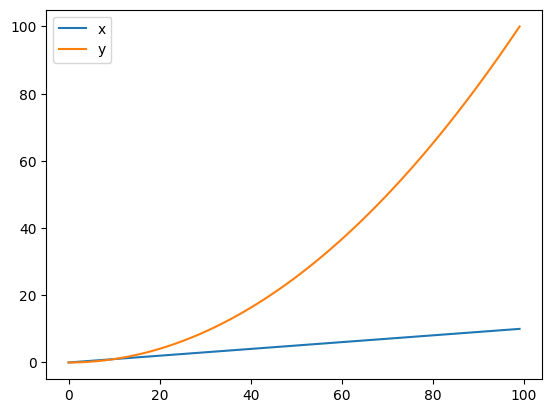

In [59]:
# Create a DataFrame from the x and y arrays
# x contains linearly spaced values from 0 to 10
# y contains the squared values of x (x^2)
df=pd.DataFrame(np.array([x,y]).T,columns=list('xy'))
# Plot the DataFrame with x as the horizontal axis and y as the vertical axis
# This creates a line plot showing the quadratic relationship y = x²
df.plot()

<Axes: >

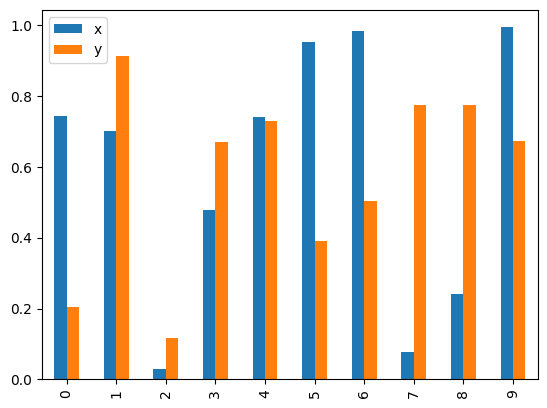

In [60]:
x=np.random.rand(10)
y=np.random.rand(10)

df2=pd.DataFrame(np.array([x,y]).T,columns=list('xy'))

df2.plot.bar()

### Data Processing

In [70]:
data={
    'First Score':[100,90,np.nan,95],
    'Second Score':[30,45,56,np.nan],
    'Third Score':[np.nan,40,80,98]
}

dataframe6=pd.DataFrame(data)
dataframe6

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,56.0,80.0
3,95.0,NaN,98.0


In [62]:
dataframe6.isnull()

,First Score,Second Score,Third Score
0,False,False,True
1,False,False,False
2,True,False,False
3,False,True,False


In [63]:
dataframe6.notnull()

,First Score,Second Score,Third Score
0,True,True,False
1,True,True,True
2,False,True,True
3,True,False,True


In [ ]:
dataframe6.fillna(0) # Fills all null cells with 0 (Not a permenant change)

,First Score,Second Score,Third Score
0,100.0,30.0,0.0
1,90.0,45.0,40.0
2,0.0,56.0,80.0
3,95.0,0.0,98.0


In [65]:
dataframe6

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,56.0,80.0
3,95.0,NaN,98.0


In [66]:
dataframe6.fillna(0,inplace=True) # Fills all null cells with 0 (permenant change, inPlace=True)

In [69]:
dataframe6

,First Score,Second Score,Third Score
0,100.0,30.0,0.0
1,90.0,45.0,40.0
2,0.0,56.0,80.0
3,95.0,0.0,98.0


In [ ]:
# Reset dataframe6 to original state with NaN values before demonstrating replace method
dataframe6 = pd.DataFrame(data)
# The replace method is like the fillna method but more generic
# You can choose any type of value you want to replace not just the nulls
dataframe6.replace(to_replace=np.nan,value=dataframe6.mean(),inplace=True)
dataframe6.astype(int) # Just converts the the type of the dataframe

,First Score,Second Score,Third Score
0,100,30,72
1,90,45,40
2,95,56,80
3,95,43,98
